In [ ]:
%xmode?
#Plain простой вывод без развертывания стека вызовов
#Context(по умолчанию) - с развертыванием стека вызова
#Verbose -тоже самое что и Context, но с выводом значений аргументов
%xmode plain

Exception reporting mode: Plain


# Профайлер

In [2]:
%load_ext line_profiler
#lprun - line profiler run magic command
#prun profiler run  для замера времени выполнений части команд

In [3]:
%load_ext memory_profiler
#memit - общее кол-во памяти используемое фукнцией
#mprun - для построчного описания памяти. Работает для функций описанных в отдельных модулях, а не в самом блокноте
# для создания модуля используется магическая команда %%file

## Время выполнения отдельного оператора

# Numpy

In [4]:
import numpy as np

C:\Users\untro\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\untro\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
C:\Users\untro\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)


In [5]:
%memit a = np.array([1,2,3,4,5])

peak memory: 56.11 MiB, increment: 0.16 MiB


In [6]:
#создаем массив целых чисел длины 10, заполненный нулями
np.zeros(10,dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
#создаем массив размером 3x5 значений с плавающей точкой, заполненный единицами
%memit np.ones((3,5),dtype = np.int64)

peak memory: 56.27 MiB, increment: 0.06 MiB


In [8]:
%memit [[1,2,3,4,5],[6,7,8,9,10],[9,8,7,6,5]]

peak memory: 56.32 MiB, increment: 0.05 MiB


In [9]:
import math

In [10]:
#CСоздаем массив 3x5 заполненный значением pi
np.full((3,5),math.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265]])

In [11]:
# Создаем массив, заполненный линейной последовательностью,        
# начинающейся с 0 и заканчивающейся 20, с шагом 2        
# (аналогично встроенной функции range())
np.arange(0,20,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [12]:
#Создаем массив из пяти элементов, равномерно располагающихся между 0 и 1
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [13]:
#создаем массив размером 3x3 равномерно распределенных случайных величин от 0 до 1
np.random.random((3,3))

array([[0.21978961, 0.04413748, 0.55513389],
       [0.96942017, 0.94367328, 0.22188103],
       [0.13249209, 0.58965723, 0.55191623]])

In [14]:
#распеределенных нормально с мат ожиданием равным 0 и дисперсией равным 1
np.random.normal(loc= 0,scale =1,size =(3,3))

array([[-0.24970274,  1.2085876 ,  0.86168424],
       [-0.9589233 , -1.04389273,  0.20824498],
       [-0.35851662, -0.12592484,  1.32104969]])

In [15]:
# Создаем массив размером 3 x 3 случайных целых числа         
# в промежутке [0, 10)
np.random.randint(0,10,(3,3))

array([[8, 2, 6],
       [9, 5, 9],
       [8, 2, 6]])

In [16]:
#единичная матрица (3x3)
%timeit np.eye(3)

3.13 µs ± 280 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [17]:
# Создаем неинициализированный массив из трех целочисленных        
# значений. Значениями будут произвольные, случайно оказавшиеся         
# в соответствующих ячейках памяти данные 
np.empty(3)

array([4.94065646e-324, 3.95252517e-323, 5.73033441e+252])

In [18]:
np.random.seed(0)

In [19]:
x1 = np.random.randint(10,size = 6)
x2 = np.random.randint(10,size = (3,4))
x3 = np.random.randint(10,size = (3,4,5))

In [20]:
print("Размерность x3(x3 ndim):",x3.ndim)
print("Размер каждого измерения x3(x3 shape):",x3.shape)
print("Общий размер массива x3:",x3.size)
print('Тип хранимых данных: {0}, Размер хранимого типа: {1} байта'.format(x3.dtype,x3.itemsize))
print('Полный размер массива: ',x3.nbytes)

Размерность x3(x3 ndim): 3
Размер каждого измерения x3(x3 shape): (3, 4, 5)
Общий размер массива x3: 60
Тип хранимых данных: int32, Размер хранимого типа: 4 байта
Полный размер массива:  240


# Многомерные подмассивы

In [21]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

## Срезы массивов возвращают предствления(views), но не копии данных(в отличии от python list)

In [22]:
x2_sub = x2[:2,:2]

In [23]:
x2_sub

array([[3, 5],
       [7, 6]])

In [24]:
x2_sub[0,0] = 99

In [25]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


## Получение Копии массива

In [26]:
x2_sub_copy = x2[:2,:2].copy()
x2_sub_copy

array([[99,  5],
       [ 7,  6]])

In [27]:
x2_sub_copy[0,0] = -1

In [28]:
x2_sub_copy

array([[-1,  5],
       [ 7,  6]])

In [29]:
x2

array([[99,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

## Изменение формы массивов

In [30]:
#1) с помощью reshape. НЕобходимо чтобы размер исходного массива совпадал с размером изменненного
grid = np.arange(1,10).reshape((3,3))

In [31]:
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

$преобразование\ одномерного\ массива\ в\ двумерную\ матрицу-строку\ или\ матрицу-столбец$
$1)\ используя \  ключевое \ слово \ newaxis$<br/> 
$2)\ Используя \ reshape$


In [82]:
x = np.arange(1,4)

In [83]:
#преобразование в вектор-строку c помощью reshape
b = x.reshape(((1,x.shape[0])))
#с помощью np.newaxis
c = x[np.newaxis,:]
print(c)
b==c

[[1 2 3]]


array([[ True,  True,  True]])

In [84]:
#преобразование в вектор столбец с помощью newaxis
d = x[:,np.newaxis]
e = x.reshape((x.shape[0],1))
d == e
print(e.shape)

(3, 1)


## Слияние массивов

In [36]:
y = np.array(x[::-1])
z = [99,99,99]

In [37]:
np.concatenate([x,y])
w =np.concatenate([x,y,z])
w

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

### для двумерных: <br/>
1) По Первой оси

In [38]:
print(x2)
np.concatenate([x2,x2])

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


array([[99,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7],
       [99,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

2) По второй оси

In [92]:
np.concatenate([x2,x2],axis = 1)

array([[99,  7,  5,  5, 99,  7,  5,  5],
       [ 0,  1,  5,  9,  0,  1,  5,  9],
       [ 3,  0,  5,  0,  3,  0,  5,  0]])

Для работы с различающимися измерениями проще и понятнее работать с np.vstack(вертикальное объединение) и np.hstack(горизонтальное)

In [39]:
np.vstack([x,x2])

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [40]:
print(x.shape)
x2_t = np.empty((2,3))
np.vstack([x,x2_t])

(3,)


array([[1., 2., 3.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [98]:
x3_t = np.array([[99],[99]])
np.hstack([x2_t,x3_t])

array([[ 0.,  0.,  0., 99.],
       [ 0.,  0.,  0., 99.]])

## Разбиение массивов

In [112]:
np.split?

In [113]:
print(w.shape)
x1,x2,x3 = np.split(ary=w,indices_or_sections=[3,5])
print(x1,x2,x3)

(9,)
[1 2 3] [3 2] [ 1 99 99 99]


In [118]:
grid = np.arange(16).reshape((4,4))
print(grid)
upper,lower = np.vsplit(ary=grid,indices_or_sections=[2])
upper

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [117]:
left,right = np.hsplit(ary = grid,indices_or_sections=[2])
left

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]])

In [119]:
from scipy import special

In [123]:
import pandas as pd
import os

In [124]:
data = pd.read_csv(os.path.join('data','president_heights.csv'))

In [126]:
data.head()
heights = np.array(data['height(cm)'])

In [140]:
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [135]:
print('Mean height:',heights.mean())
print('Standart deviation:',heights.std())
print('Minimum height:',heights.min())
print('Maximum height:',heights.max())
print('25th percentile:',np.percentile(heights,25))
print('Median:', np.median(heights))
print('75th percentile:', np.percentile(heights,75))

Mean height: 179.73809523809524
Standart deviation: 6.931843442745892
Minimum height: 163
Maximum height: 193
25th percentile: 174.25
Median: 182.0
75th percentile: 183.0


In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

Text(0,0.5,'кол-во')

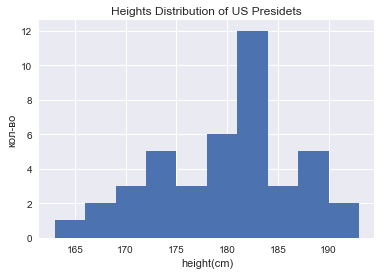

In [146]:
plt.hist(heights)
plt.title('Heights Distribution of US Presidets')
plt.xlabel('height(cm)')
plt.ylabel("кол-во")

In [55]:
X = np.arange(12).reshape((3,4))
row = np.array([0,1,2])
col = np.array([2,1,3])
print(row)
print(col)
X

[0 1 2]
[2 1 3]


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [56]:
X[row,col]

array([ 2,  5, 11])

In [58]:
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [59]:
mean = [0,0]
cov = [[1,2],[2,5]]

x = np.random.multivariate_normal(mean,cov,100)

In [66]:
X[:]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## K ближайших соседей

In [93]:
X = np.random.rand(10,2)
print(X)

[[0.80037846 0.87713097]
 [0.09345946 0.42630588]
 [0.47322067 0.58019711]
 [0.71624417 0.02706898]
 [0.73139734 0.76696351]
 [0.00976644 0.30828617]
 [0.23286547 0.50342743]
 [0.95372138 0.5578113 ]
 [0.09746869 0.62167849]
 [0.86302262 0.15763228]]


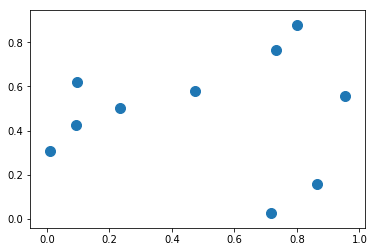

In [94]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],s = 100);

## Строим матрицу расстояний между взятыми попарно точками

In [99]:
print(X[:,np.newaxis,:].shape) # Строит матрицу где по строкам повторения координат i точки,число стоблцов совпадает совпадает с числом точек
print(X[:,np.newaxis,:])
print(X[np.newaxis,:,:].shape) # теперь мы строим матицу всех координат в ввде матрицы для каждой точки
print(X[np.newaxis,:,:])
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:] )**2,axis =-1)

(10, 1, 2)
[[[0.80037846 0.87713097]]

 [[0.09345946 0.42630588]]

 [[0.47322067 0.58019711]]

 [[0.71624417 0.02706898]]

 [[0.73139734 0.76696351]]

 [[0.00976644 0.30828617]]

 [[0.23286547 0.50342743]]

 [[0.95372138 0.5578113 ]]

 [[0.09746869 0.62167849]]

 [[0.86302262 0.15763228]]]
(1, 10, 2)
[[[0.80037846 0.87713097]
  [0.09345946 0.42630588]
  [0.47322067 0.58019711]
  [0.71624417 0.02706898]
  [0.73139734 0.76696351]
  [0.00976644 0.30828617]
  [0.23286547 0.50342743]
  [0.95372138 0.5578113 ]
  [0.09746869 0.62167849]
  [0.86302262 0.15763228]]]


In [100]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Сортим нашу матрицу расстояний, чтобы получить ближайшие точки!(лишняя работа)

In [102]:
nearest = np.argsort(dist_sq,axis = 1)

In [103]:
print(nearest)

[[0 4 7 2 6 9 8 1 3 5]
 [1 5 6 8 2 4 3 9 0 7]
 [2 6 4 8 1 0 7 5 9 3]
 [3 9 7 2 6 1 4 5 0 8]
 [4 0 7 2 6 9 8 1 3 5]
 [5 1 6 8 2 3 4 9 0 7]
 [6 1 8 2 5 4 3 0 9 7]
 [7 4 0 9 2 3 6 8 1 5]
 [8 6 1 5 2 4 0 3 7 9]
 [9 3 7 2 4 6 0 1 5 8]]


## Но нам нужно только K ближайших точек

In [104]:
K = 2
nearest_partition = np.argpartition(dist_sq,K+1,axis = 1)

In [105]:
nearest_partition

array([[0, 4, 7, 2, 6, 9, 3, 1, 8, 5],
       [1, 6, 5, 8, 4, 2, 3, 9, 7, 0],
       [2, 6, 4, 8, 1, 0, 5, 7, 3, 9],
       [3, 7, 9, 2, 1, 6, 4, 5, 8, 0],
       [4, 0, 7, 2, 6, 9, 3, 1, 8, 5],
       [1, 6, 5, 8, 4, 2, 3, 9, 7, 0],
       [1, 6, 8, 2, 5, 4, 3, 0, 7, 9],
       [7, 4, 0, 9, 2, 3, 1, 5, 8, 6],
       [8, 6, 1, 5, 4, 2, 0, 7, 3, 9],
       [9, 3, 7, 2, 4, 5, 6, 1, 8, 0]], dtype=int64)

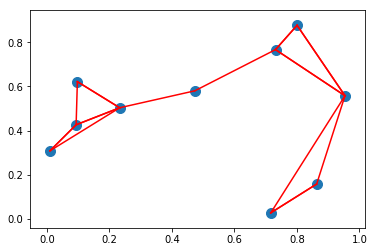

In [106]:
plt.scatter(X[:,0],X[:,1],s = 100);
for i in range(X.shape[0]):
    for j in nearest_partition[i,:K+1]:
        plt.plot(*zip(X[j],X[i]),color='red')

## Pandas

In [107]:
import pandas as pd

In [108]:
#Series одномерный массив индексированных данных 
data = pd.Series([0.25,0.5,0.75,1.0])

In [110]:
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [113]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [114]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [115]:
#Series по факту является обощенным массивом. Главное отличие это привязка к индексу:
# в numpy индекс неявен и целочисленнен, в Series он явный и нефиксированного типa
data = pd.Series(data=[0.25,0.5,0.75,1.0],index = ['a','b','c','d'])

In [117]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [118]:
data['b']

0.5

In [120]:
#Series специализированный словарь
population_dict = {
    'California':38332521,
    'Texas':26448193,
    'New York':19651127
}
population = pd.Series(population_dict)

In [121]:
population

California    38332521
Texas         26448193
New York      19651127
dtype: int64

In [124]:
population[:'New York']

California    38332521
Texas         26448193
New York      19651127
dtype: int64

## DataFrame

In [127]:
area_dict = {'California':423967,'Texas':695662,'New York':141297}
area = pd.Series(area_dict)
states = pd.DataFrame({'population':population,'area':area})

In [128]:
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


In [129]:
states.index

Index(['California', 'Texas', 'New York'], dtype='object')

In [131]:
states.columns

Index(['population', 'area'], dtype='object')

In [133]:
states.area
states['area']

California    423967
Texas         695662
New York      141297
Name: area, dtype: int64

## Создание объектов DataFrame

### из одного объекта Series

In [134]:
pd.DataFrame(population,columns = ['population'])

,population
California,38332521
Texas,26448193
New York,19651127


### из списка словарей

In [135]:
data = [{'a': i,'b': 2*i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [136]:
pd.DataFrame([{'a':1,'b':2},{'b':3,'c':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


## из словаря объектов Series

In [137]:
pd.DataFrame({'population':population,'area':area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


## Из двумерного массива Numpy 

In [138]:
pd.DataFrame(np.random.rand(3,2),
            columns = ['foo','bar'],
            index =['a','b','c'])

,foo,bar
a,0.992430,0.085001
b,0.094458,0.633608
c,0.949297,0.936746
